<a href="https://colab.research.google.com/github/Yelaina/Python-Projects/blob/main/Copy_of_SC385_Spring_Data_Analysis_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis exercise 2

#### SC385 Spring Term, 2020–2021

## 1. Introduction
In this exercise, you will use social and health-related variables (also called _features_ in the machine learning literature) to predict who is likely or not to take up a Covid-19 vaccine. Results from such an analysis could be useful, for example, if the NHS plans an information campaign among people who are unlikely to vaccinate. You will use data from [The Understanding Society: COVID-19 Study](https://www.understandingsociety.ac.uk/topic/covid-19). Below is a description of the outcome variable and predictive features, many of which we used in our lab on prediction and unsupervised machine learning. 

## 2. Outcome and predictive features  
#### Outcome: Output _(Y)_

|Description| Variable| Values
| ---| ---|---|
|Likelihood of taking up a coronavirus vaccination | cf_vaxxer | 1 = Very likely, 2 = Likely, 3 = Unlikely, 4 = Very unlikely

#### Predictors: Input features _(X)_

|Description| Variable| Values
| ---| ---|---|
|Age | cf_age | Integer values (whole numbers)
| Respondent sex | cf_sex_cv | 1 = Male, 2 = Female, 3 = Prefer not to say
| General health | cf_scsf1 | 1 = Excelent, 2 = Very good, 3 = Good, 4 = Fair, 5 = Poor 
| At risk of serious illness from COVID-19 | cf_clinvuln_dv | 0 = no risk (not clinically vulnerable), 1 = moderate risk (clinically vulnerable), 2 = high risk (clinically extremely vulnerable)
| People in this neighbourhood can be trusted | cf_nbrcoh3 | 1 = Strongly agree, 2 = Agree, 3 = Neither agree nor disagree, 4 = Disagree, 5 = Strongly disagree

## 3. Python libraries 
To perform your analysis, you will need to import Python libraries and modules we used in the lab on prediction and supervised machine learning, for example `sklearn`, `pandas`, `numpy`, `seaborn`, `matplotlib.pyplot`.

## 4. Tasks

### 4.1. Exploratory data analysis
* Describe and visualise and describe the outcome variable (cf_vaxxer) using the approach we used in the lab on prediction and supervised machine learning. 
* Describe and visualise one of the features of your choice.

Use descriptive statistics and visualisations appropriate for the respective variable.    

### 4.2. Preparing variables for your machine leaning modelling
* Transform the outcome variable to a binary variable where 1 means likely to take up a Covid vaccine and 0 means unlikely to take a Covid vaccine. 
* Preprocess the features: standardise the continuous variables and create dummy variables out of the categorical variables   

### 4.3. Splitting the data and balancing the class labels
* Split the data into train and test data sets using the `sklearn` function `train_test_split`: 
  * Set the proportion of the dataset to include in the test split to 0.3 (this will split the data into 30% test set and 70% train set). 
  * Use the parameter `stratify` and pass your outcome array `y` as an argument so that your train and test data set have the same proportion of majority (1) and minority (0) class labels. 
* To balance the two classes, use the method called ADASYN: Adaptive Synthetic Sampling Method for Imbalanced Data. The method over-samples the minority class in the training data set until both classes have an equal number of observations.

### 4.4. Model initialisation, model fitting, and model validation using the train data
* Initialise many [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) classifiers by varying the `n_neighbors` parameter between 1 and 20 and fit on the training set. Import the function [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and perform 5-fold cross-validation to evaluate the twenty models using the accuracy score. You can use the same procedure we used to find the best number of _k_ clusters in the lab on _k_-mean clustering. 
* Repeat the procedure but this time set the parameter `weights` in the [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) estimator to `distance` so that closer neighbours of a query point will have a greater influence than distant neighbours.
* Briefly describe your results and select the model with the highest accuracy score from the cross-validation method. 

### 4.5. Predict who is likely or not to take up a Covid-19 vaccine 
* Use the model with the highest accuracy to predict unseen observations in the test data. In this case, the aim is to predict people who would take up or not a Covid-19 vaccine based on social and health features.
* Describe the performance of your classification model on the test data by  reporting the model accuracy score and the confusion matrix. 
* Briefly interpret your results: 
  * What is the accuracy of your prediction of vaccination likelihood? 
  * Report and interpret the values from the confusion matrix, including true positives, false positives, true negatives, and false negatives. Which scores are of interest for your analysis, those related to the positive class (likely to vaccinate) or negative class (unlikely to vaccinate)? Why?   
  * In an event that the NHS plans an information campaign among people who are unlikely to vaccinate, which scores in the confusion matrix would be more important to evaluate the performance of your model? 
  * What would you change in order to improve the predictive accuracy of your classification model?

## 5. Reproducible research report and good research practices
To create a reproducible research report, use throughout the notebook:
* Python code in Code cells
* Hashtag symbol `#` in Code cells to introduce a comment line describing your Python code
* Markdown language in Text cells to write up your methods, results, and interpretation.

Before submission, please `Restart and run all` (under `Runtime` in the Colab menu bar) to make sure that your data analysis is computationally reproducible.

Feel free to reuse and reference code from the module Colab notebooks. You are also encouraged to consult and refer to online tutorials and sources, including [DataCamp](https://learn.datacamp.com/courses/introduction-to-data-science-in-python) courses (in particular the course [_Supervised Learning with scikit-learn_](https://learn.datacamp.com/courses/supervised-learning-with-scikit-learn)) and [Stack Overflow](https://stackoverflow.com/questions/42406233/how-to-add-title-to-seaborn-boxplot). You can refer to such sources by providing links pointing to them similar to the links to DataCamp and Stack Overflow in the previous sentence.        

## 6. Submission
You need to submit your notebook by 10am on 9 April 2021 on FASER. You can download your Colab notebook from `File` and then `Download .ipynb`, and submit on FASER your downloaded notebook.

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns

In [ ]:
# Import the Drive helper
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Loading the data
USocietyCovid = pd.read_csv('/content/drive/My Drive/UnderstandingSocietyCovidNov2020.csv')

In [ ]:
#Using the 'head' function to return the first 5 rows of the data frame, in order to quickly test if the object has the right type of data in it.
USocietyCovid.head()

,pidp,psu,strata,birthy,racel_dv,bornuk_dv,i_hidp,j_hidp,k_hidp,i_ioutcome,j_ioutcome,k_ioutcome,cf_welsh,cf_dobchk,cf_age,cf_sex_cv,cf_addrchk,cf_couplewsh,cf_hhnum,cf_personsexa,cf_personsexb,cf_personsexc,cf_personsexd,cf_personsexe,cf_personsexf,cf_personsexg,cf_personsexh,cf_personsexi,cf_personsexj,cf_personsexk,cf_personagea,cf_personageb,cf_personagec,cf_personaged,cf_personagee,cf_personagef,cf_personageg,cf_personageh,cf_personagei,cf_personagej,...,cf_tslonelyend,cf_tscffst,cf_tscffend,cf_tshsingst,cf_tshsingend,cf_tsempst,cf_tsempend,cf_tsttwst,cf_tsttwend,cf_tstranspst,cf_tstranspend,cf_tsfinst,cf_tsfinend,cf_tsfinsecst,cf_tsfinsecend,cf_tsnbhdst,cf_tsnbhdend,cf_tsnovschst,cf_tsnovschend,cf_tslfsatst,cf_tslfsatend,cf_tsghqst,cf_tsghqend,cf_tsclosest,cf_tscloseend,cf_screenres,cf_browserres,cf_useragentstring,cf_ff_prevsurv,cf_ff_intd,cf_ff_intm,cf_ff_inty,cf_ff_country,cf_gor_dv,cf_aid_dv,cf_betaindin_xw,cf_betaindin_xw_t,cf_betaindin_lw,cf_betaindin_lw_t1,cf_betaindin_lw_t2
0,76165,19,6,1982,1,1,141657616,141460418,141045620,11,11,11,-8,1,37,2,1,-8,4,1,1,1,-8,-8,-8,-8,-8,-8,-8,-8,40,4,1,-8,-8,-8,-8,-8,-8,-8,...,11/29/2020 15:28:18,11/29/2020 15:28:18,11/29/2020 15:28:44,11/29/2020 15:28:44,11/29/2020 15:28:50,11/29/2020 15:28:50,11/29/2020 15:32:04,11/29/2020 15:32:04,11/29/2020 15:32:04,11/29/2020 15:32:04,11/29/2020 15:32:36,11/29/2020 15:32:36,11/29/2020 15:34:36,11/29/2020 15:34:36,11/29/2020 15:35:18,11/29/2020 15:35:18,11/29/2020 15:35:51,11/29/2020 15:35:51,11/29/2020 15:36:02,11/29/2020 15:36:02,11/29/2020 15:36:11,11/29/2020 15:36:11,11/29/2020 15:36:38,11/29/2020 15:36:38,11/29/2020 15:41:09,412x892,412x771,Mozilla/5.0 (Linux; Android 10; moto g(8)) App...,1,28,9,2020,1,5,617990,0.000000,0.000000,0.000000,0.000000,0.000000
1,732365,157,43,1985,1,1,619371216,618949618,618698020,11,11,11,-8,1,35,1,1,-8,3,1,2,-8,-8,-8,-8,-8,-8,-8,-8,-8,60,60,-8,-8,-8,-8,-8,-8,-8,-8,...,11/26/2020 19:33:19,11/26/2020 19:33:19,11/26/2020 19:34:02,11/26/2020 19:34:02,11/26/2020 19:34:09,11/26/2020 19:34:09,11/26/2020 19:36:07,11/26/2020 19:36:07,11/26/2020 19:36:07,11/26/2020 19:36:07,11/26/2020 19:36:39,11/26/2020 19:36:39,11/26/2020 19:38:17,11/26/2020 19:38:17,11/26/2020 19:38:50,11/26/2020 19:38:50,11/26/2020 19:42:51,11/26/2020 19:42:51,11/26/2020 19:42:51,11/26/2020 19:42:51,11/26/2020 19:42:57,11/26/2020 19:42:57,11/26/2020 19:43:50,11/26/2020 19:43:50,11/26/2020 19:44:10,1536x2048,1024x656,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_6...,1,24,9,2020,1,2,613916,2.169419,2.130569,0.000000,2.733655,2.316389
2,1587125,215,65,1965,13,1,618269616,617895618,617671220,11,11,11,-8,1,55,2,1,-8,1,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,...,11/26/2020 20:10:14,11/26/2020 20:10:14,11/26/2020 20:10:44,11/26/2020 20:10:44,11/26/2020 20:10:52,11/26/2020 20:10:52,11/26/2020 20:12:31,11/26/2020 20:12:31,11/26/2020 20:12:37,11/26/2020 20:12:37,11/26/2020 20:13:03,11/26/2020 20:13:03,11/26/2020 20:14:49,11/26/2020 20:14:49,11/26/2020 20:15:36,11/26/2020 20:15:36,11/26/2020 20:16:06,11/26/2020 20:16:06,11/26/2020 20:16:06,11/26/2020 20:16:06,11/26/2020 20:16:09,11/26/2020 20:16:09,11/26/2020 20:46:51,11/26/2020 20:46:51,11/26/2020 20:47:09,360x740,360x572,Mozilla/5.0 (Linux; Android 9; SAMSUNG SM-G950...,1,25,9,2020,1,1,601698,0.513182,0.509362,0.512137,0.503554,0.512945
3,4849085,560,148,1982,1,1,347554816,347255618,346990420,11,11,11,-8,1,38,1,1,-8,2,1,-8,-8,-8,-8,-8,-8,-8,-8,-8,-8,44,-8,-8,-8,-8,-8,-8,-8,-8,-8,...,11/26/2020 21:12:20,11/26/2020 21:12:20,11/26/2020 21:12:44,11/26/2020 21:12:44,11/26/2020 21:13:03,11/26/2020 21:13:03,11/26/2020 21:15:36,11/26/2020 21:15:36,11/26/2020 21:15:41,11/26/2020 21:15:41,11/26/2020 21:16:02,11/26/2020 21:16:02,11/26/2020 21:18:07,11/26/2020 21:18:07,11/26/2020 21:18:42,11/26/2020 21:18:42,11/26/2020 21:19:04,11/26/2020 21:19:04,11/26/2020 21:19:04,11/26/2020 21:19:04,11/26/2020 21:19:08,11/26/2020 21:19:08,11/26/2020 21:19:47,11/26/2020 21:19:47,11/26/2020 21:20:10,1668x22

In [ ]:
#Selecting the Variables
USocietyCovid = USocietyCovid[['cf_vaxxer', 'cf_age', 'cf_sex_cv', 'cf_scsf1','cf_clinvuln_dv', 'cf_nbrcoh3']]
USocietyCovid

,cf_vaxxer,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv,cf_nbrcoh3
0,2,37,2,2,0,3
1,3,35,1,4,0,4
2,3,55,2,2,0,3
3,1,38,1,3,1,2
4,1,67,2,2,0,3
...,...,...,...,...,...,...
12030,1,57,1,2,0,2
12031,2,70,2,3,1,3
12032,2,64,1,2,0,3
12033,4,31,1,1,0,-8


In [ ]:
USocietyCovid = USocietyCovid.mask(USocietyCovid < 0)
USocietyCovid

,cf_vaxxer,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv,cf_nbrcoh3
0,2.0,37,2,2.0,0.0,3.0
1,3.0,35,1,4.0,0.0,4.0
2,3.0,55,2,2.0,0.0,3.0
3,1.0,38,1,3.0,1.0,2.0
4,1.0,67,2,2.0,0.0,3.0
...,...,...,...,...,...,...
12030,1.0,57,1,2.0,0.0,2.0
12031,2.0,70,2,3.0,1.0,3.0
12032,2.0,64,1,2.0,0.0,3.0
12033,4.0,31,1,1.0,0.0,NaN


In [ ]:
USocietyCovid_NoNaN = USocietyCovid.dropna()
USocietyCovid_NoNaN

,cf_vaxxer,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv,cf_nbrcoh3
0,2.0,37,2,2.0,0.0,3.0
1,3.0,35,1,4.0,0.0,4.0
2,3.0,55,2,2.0,0.0,3.0
3,1.0,38,1,3.0,1.0,2.0
4,1.0,67,2,2.0,0.0,3.0
...,...,...,...,...,...,...
12029,2.0,41,1,3.0,0.0,3.0
12030,1.0,57,1,2.0,0.0,2.0
12031,2.0,70,2,3.0,1.0,3.0
12032,2.0,64,1,2.0,0.0,3.0


In [ ]:
#Outcome Variable
USocietyCovid_Outcome = USocietyCovid_NoNaN[['cf_vaxxer']]
USocietyCovid_Outcome

,cf_vaxxer
0,2.0
1,3.0
2,3.0
3,1.0
4,1.0
...,...
12029,2.0
12030,1.0
12031,2.0
12032,2.0


In [ ]:
USocietyCovid_Outcome

,cf_vaxxer
0,2.0
1,3.0
2,3.0
3,1.0
4,1.0
...,...
12029,2.0
12030,1.0
12031,2.0
12032,2.0


Tasks

### 4.1. Exploratory data analysis
* Describe and visualise and describe the outcome variable (cf_vaxxer) using the approach we used in the lab on prediction and supervised machine learning. 
* Describe and visualise one of the features of your choice.

Use descriptive statistics and visualisations appropriate for the respective variable.

### 4.2. Preparing variables for your machine leaning modelling
* Transform the outcome variable to a binary variable where 1 means likely to take up a Covid vaccine and 0 means unlikely to take a Covid vaccine. 
* Preprocess the features: standardise the continuous variables and create dummy variables out of the categorical variables   

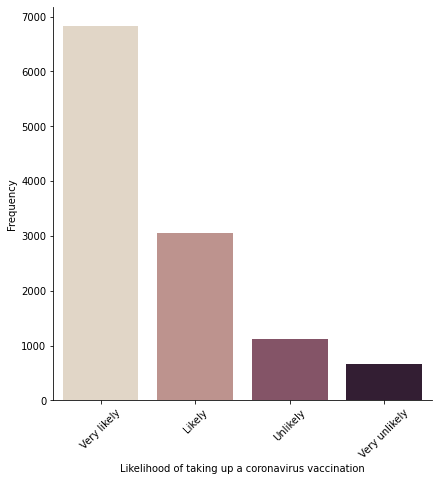

In [ ]:
fig = sns.catplot(x="cf_vaxxer", 
            kind = "count",
            height=6, aspect=1, palette="ch:.25",
            data = USocietyCovid_Outcome)

# Alteration of the plot
(fig.set_axis_labels("Likelihood of taking up a coronavirus vaccination", "Frequency")
    .set_xticklabels(["Very likely","Likely","Unlikely","Very unlikely"])
    .set_xticklabels(rotation=45))

From the above bar chart we can see that the majority of people have a strong likelihood of taking up a coronavirus vaccination, with almost 7000 participants belonging to the 'very likely' category. This graph also shows us that 3000 participants are also 'likely' to take up a coronavirus vaccination. On the other hand, the number of participants who are 'unlikely' or 'very unlikely' to take up a coronavirus vaccination is significantly less than those who are more likely. With approximately 1000 participants belonging to the 'unlikely' category and 700 participants belonging to the 'very unlikely' category. Therefore, in accordance with this bar graph, one may say that the probaility of citizens of United Kingdom taking up a coronavirus vaccination is high.

In [ ]:
USocietyCovid_Outcome = USocietyCovid_Outcome[["cf_vaxxer"]].replace([1,2,3,4],[1,1,0,0])
USocietyCovid_Outcome

,cf_vaxxer
0,1.0
1,0.0
2,0.0
3,1.0
4,1.0
...,...
12029,1.0
12030,1.0
12031,1.0
12032,1.0


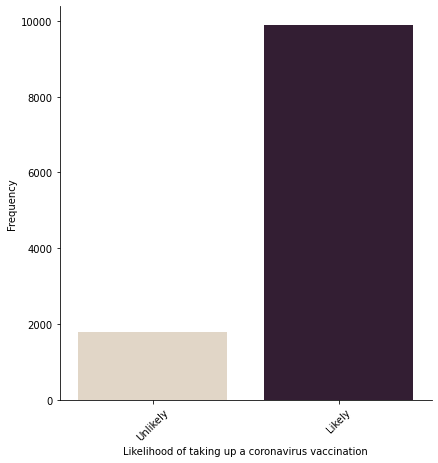

In [ ]:
#Transformation of outcome variable into binary variable
fig = sns.catplot(x="cf_vaxxer", 
            kind = "count",
            height=6, aspect=1, palette="ch:.25",
            data = USocietyCovid_Outcome)

# Change of the plot
(fig.set_axis_labels("Likelihood of taking up a coronavirus vaccination", "Frequency")
    .set_xticklabels(["Unlikely","Likely"])
    .set_xticklabels(rotation=45))

The outcome variable in which this bar graph is based upon has been changed to a binary variable where 1 means 'likely' to take up a Covid vaccine and 0 means 'unlikely' to take a Covid vaccine. This graph suggests that there is an overwhelming probability of people who are likely to take up a coronavirus vaccination (almost 10,000) compared to those who are unlikely (Less than 2000).

In [ ]:
USocietyCovid_Predictors = USocietyCovid_NoNaN[['cf_age', 'cf_sex_cv', 'cf_scsf1','cf_clinvuln_dv', 'cf_nbrcoh3']]
USocietyCovid_Predictors

,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv,cf_nbrcoh3
0,37,2,2.0,0.0,3.0
1,35,1,4.0,0.0,4.0
2,55,2,2.0,0.0,3.0
3,38,1,3.0,1.0,2.0
4,67,2,2.0,0.0,3.0
...,...,...,...,...,...
12029,41,1,3.0,0.0,3.0
12030,57,1,2.0,0.0,2.0
12031,70,2,3.0,1.0,3.0
12032,64,1,2.0,0.0,3.0


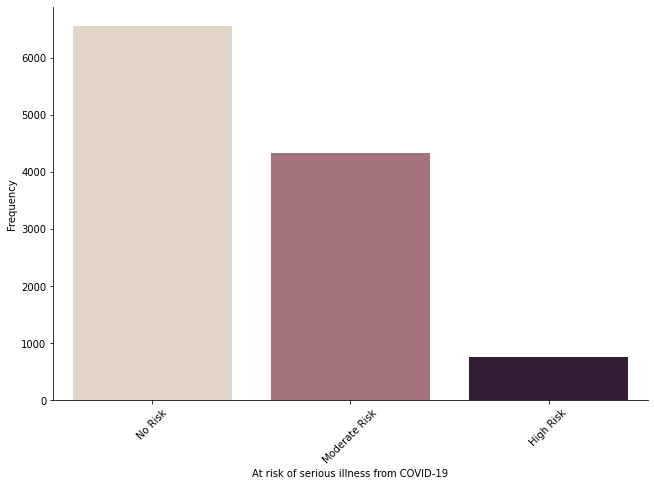

In [ ]:
#Plotting of the variable 'At risk of serious illness from Covid-19'
fig = sns.catplot(x="cf_clinvuln_dv", 
            kind = "count",
            height=6, aspect=1.5, palette="ch:.25",
            data = USocietyCovid_Predictors)

# Tweak the plot
(fig.set_axis_labels("At risk of serious illness from COVID-19", "Frequency")
    .set_xticklabels(["No Risk","Moderate Risk","High Risk" ])
    .set_xticklabels(rotation=45))

The feature I have chosen to describe and visualise is the predictor 'At risk of serious illness from COVID-19'. From this visualisation one can see that most participants are not at risk from serious illness of COVID-19, with approximately 6500 people belonging to the 'No Risk' category. However, around 4000 are at moderate risk from serious illness from COVID-19, which is not a small number by any means. In addition,roughly 900 participants are at high risk of serious illness from COVID-19. Therefore, although the majority of participants have no risk of serious illness from COVID-19, there is still a high number and percentage of people with at least some risk.

In [ ]:
type(USocietyCovid_Predictors)

pandas.core.frame.DataFrame

In [ ]:
USocietyCovid_Predictors

,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv,cf_nbrcoh3
0,37,2,2.0,0.0,3.0
1,35,1,4.0,0.0,4.0
2,55,2,2.0,0.0,3.0
3,38,1,3.0,1.0,2.0
4,67,2,2.0,0.0,3.0
...,...,...,...,...,...
12029,41,1,3.0,0.0,3.0
12030,57,1,2.0,0.0,2.0
12031,70,2,3.0,1.0,3.0
12032,64,1,2.0,0.0,3.0


In [ ]:
from sklearn.preprocessing import StandardScaler  # For standardising data
scaler = StandardScaler() # Initialising the scaler using the default arguments 
USocietyCovid_Predictors[['cf_age', 'cf_scsf1','cf_clinvuln_dv', 'cf_nbrcoh3']] = scaler.fit_transform(USocietyCovid_Predictors[['cf_age', 'cf_scsf1','cf_clinvuln_dv', 'cf_nbrcoh3']]) # Fit to continuous input variables and return the standardised dataset 
USocietyCovid_Predictors

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv,cf_nbrcoh3
0,-1.110060,2,-0.567764,-0.814216,0.989113
1,-1.234922,1,1.559437,-0.814216,2.251003
2,0.013699,2,-0.567764,-0.814216,0.989113
3,-1.047629,1,0.495836,0.807406,-0.272777
4,0.762871,2,-0.567764,-0.814216,0.989113
...,...,...,...,...,...
12029,-0.860336,1,0.495836,-0.814216,0.989113
12030,0.138561,1,-0.567764,-0.814216,-0.272777
12031,0.950164,2,0.495836,0.807406,0.989113
12032,0.575578,1,-0.567764,-0.814216,0.989113


In [ ]:
USocietyCovid_Predictors

,cf_age,cf_sex_cv,cf_scsf1,cf_clinvuln_dv,cf_nbrcoh3
0,-1.110060,2,-0.567764,-0.814216,0.989113
1,-1.234922,1,1.559437,-0.814216,2.251003
2,0.013699,2,-0.567764,-0.814216,0.989113
3,-1.047629,1,0.495836,0.807406,-0.272777
4,0.762871,2,-0.567764,-0.814216,0.989113
...,...,...,...,...,...
12029,-0.860336,1,0.495836,-0.814216,0.989113
12030,0.138561,1,-0.567764,-0.814216,-0.272777
12031,0.950164,2,0.495836,0.807406,0.989113
12032,0.575578,1,-0.567764,-0.814216,0.989113


In [ ]:
USocietyCovid_Predictors = pd.get_dummies(USocietyCovid_Predictors, columns=["cf_sex_cv"])

In [ ]:
USocietyCovid_Predictors


,cf_age,cf_scsf1,cf_clinvuln_dv,cf_nbrcoh3,cf_sex_cv_1,cf_sex_cv_2,cf_sex_cv_3
0,-1.110060,-0.567764,-0.814216,0.989113,0,1,0
1,-1.234922,1.559437,-0.814216,2.251003,1,0,0
2,0.013699,-0.567764,-0.814216,0.989113,0,1,0
3,-1.047629,0.495836,0.807406,-0.272777,1,0,0
4,0.762871,-0.567764,-0.814216,0.989113,0,1,0
...,...,...,...,...,...,...,...
12029,-0.860336,0.495836,-0.814216,0.989113,1,0,0
12030,0.138561,-0.567764,-0.814216,-0.272777,1,0,0
12031,0.950164,0.495836,0.807406,0.989113,0,1,0
12032,0.575578,-0.567764,-0.814216,0.989113,1,0,0


### 4.3. Splitting the data and balancing the class labels
* Split the data into train and test data sets using the `sklearn` function `train_test_split`: 
  * Set the proportion of the dataset to include in the test split to 0.3 (this will split the data into 30% test set and 70% train set). 
  * Use the parameter `stratify` and pass your outcome array `y` as an argument so that your train and test data set have the same proportion of majority (1) and minority (0) class labels. 
* To balance the two classes, use the method called ADASYN: Adaptive Synthetic Sampling Method for Imbalanced Data. The method over-samples the minority class in the training data set until both classes have an equal number of observations.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(USocietyCovid_Predictors, USocietyCovid_Outcome, test_size=0.3, stratify=USocietyCovid_Outcome, random_state=0)

In [ ]:
USocietyCovid_Predictors.shape

(11667, 7)

In [ ]:
USocietyCovid_Outcome.shape

(11667, 1)

In [ ]:
y_train.shape

(8166, 1)

In [ ]:
y_test.shape

(3501, 1)

In [ ]:
from imblearn.over_sampling import ADASYN

# Initialisation of the ADASYN resampling method; set random_state for reproducibility
adasyn = ADASYN(random_state=0)

# Slotting the ADASYN resampling method to the train data  
X_train, y_train = adasyn.fit_resample(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

In [ ]:
y_train.shape

(13774,)

In [ ]:
(y_train == 0).sum()

6850

In [ ]:
(y_train == 1).sum()

6924

### 4.4. Model initialisation, model fitting, and model validation using the train data
* Initialise many [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) classifiers by varying the `n_neighbors` parameter between 1 and 20 and fit on the training set. Import the function [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and perform 5-fold cross-validation to evaluate the twenty models using the accuracy score. You can use the same procedure we used to find the best number of _k_ clusters in the lab on _k_-mean clustering. 
* Repeat the procedure but this time set the parameter `weights` in the [`KNeighborsClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) estimator to `distance` so that closer neighbours of a query point will have a greater influence than distant neighbours.
* Briefly describe your results and select the model with the highest accuracy score from the cross-validation method.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

mean_accuracy_score = []

N = range(1,21)
for n in N:
    kNN_Classifier = KNeighborsClassifier(n_neighbors=n)
    accuracy_score = cross_val_score(kNN_Classifier, X_train, y_train, cv=5, scoring='accuracy')
    mean_accuracy_score.append(accuracy_score.mean())

In [ ]:
mean_accuracy_score

[0.7043730880804294,
 0.6979110800063791,
 0.6865126718832993,
 0.6905782448759566,
 0.6693779712597548,
 0.6689422414122602,
 0.6550024712445979,
 0.6603032184171646,
 0.6558014410980497,
 0.6626258720198438,
 0.6550021812852318,
 0.6554386492111128,
 0.649993502274204,
 0.6534059286146401,
 0.6489776691748151,
 0.6518091223852585,
 0.6499938976733397,
 0.6479612297967516,
 0.6504292848415834,
 0.6505743172445424]

[(0.6, 0.75)]

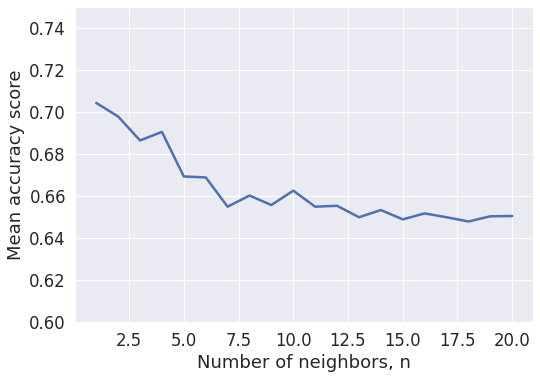

In [ ]:
# Plot appearance and size
sns.set(rc={'figure.figsize':(8.2,5.8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Generate the plot
fig = sns.lineplot(x= N, y = mean_accuracy_score)    

# Add x and y labels
labels = fig.set(xlabel='Number of neighbors, n', ylabel='Mean accuracy score')
fig.set(ylim=(0.6, 0.75))

This model does not have the highest accuracy score when compared to the model below. The mean accuracy score decreases as the number of neighbours increases, showing an inverse correlation.The mean accuracy score begins at 0.70, which is actually this model's highest score, when the number of neighbors is 2, and decreases to 0.65 when the number of neighbors rises to 20.

In [ ]:
mean_accuracy_score_weighted = []

N = range(1,21)
for n in N:
  kNN_Classifier = KNeighborsClassifier(n_neighbors=n, weights = 'distance') 
  accuracy_score = cross_val_score(kNN_Classifier, X_train, y_train, cv=5, scoring='accuracy')
  mean_accuracy_score_weighted.append(accuracy_score.mean())

[(0.6, 0.75)]

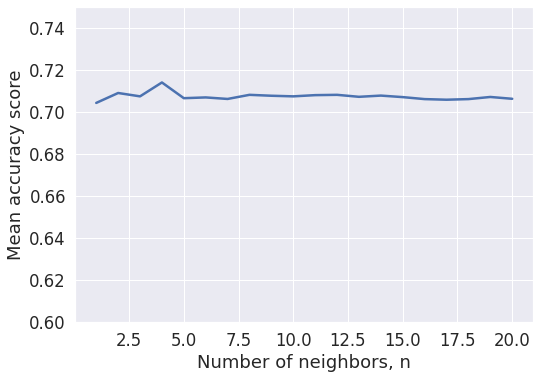

In [ ]:
# Plot appearance and size
sns.set(rc={'figure.figsize':(8.2,5.8)})
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

# Generate the plot
fig = sns.lineplot(x= N, y = mean_accuracy_score_weighted)

# Add x and y labels
labels = fig.set(xlabel='Number of neighbors, n', ylabel='Mean accuracy score')
fig.set(ylim=(0.6, 0.75))

This model has the highest accuracy score of approximately 0.71 when the number of neighbors reaches 4. From this graph we can also see that the accuracy score is quite stable and does not vary much even when the number of neighbors increases from 2 (0.70) to 20 (0.70). 

### 4.5. Predict who is likely or not to take up a Covid-19 vaccine 
* Use the model with the highest accuracy to predict unseen observations in the test data. In this case, the aim is to predict people who would take up or not a Covid-19 vaccine based on social and health features.
* Describe the performance of your classification model on the test data by  reporting the model accuracy score and the confusion matrix. 
* Briefly interpret your results: 
  * What is the accuracy of your prediction of vaccination likelihood? 
  * Report and interpret the values from the confusion matrix, including true positives, false positives, true negatives, and false negatives. Which scores are of interest for your analysis, those related to the positive class (likely to vaccinate) or negative class (unlikely to vaccinate)? Why?   
  * In an event that the NHS plans an information campaign among people who are unlikely to vaccinate, which scores in the confusion matrix would be more important to evaluate the performance of your model? 
  * What would you change in order to improve the predictive accuracy of your classification model?

In [ ]:
# selected model is n_neighbors = 4
kNN_Classifier =  KNeighborsClassifier(n_neighbors = 4)
kNN_Classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
# using the test data to predict unseen observations
y_pred_kNN = kNN_Classifier.predict(X_test)

In [ ]:
#Accuracy score of the above model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_kNN)

0.6686660954013139

Using the model with the highest accuracy score, this is accuracy of my prediction of vaccination likelihood. (0.6686660954013139 (67%)).

**Confusion Matrix**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_kNN)

array([[ 230,  302],
       [ 858, 2111]])

In [ ]:
#Report of values from the confusion matrix
pd.crosstab(y_test['cf_vaxxer'], y_pred_kNN, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
Actual,,,
0.0,230,302,532
1.0,858,2111,2969
All,1088,2413,3501


In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test,y_pred_kNN).ravel()
print('True negative = ', tn, '\nFalse positive = ', fp, '\nFalse negative = ', fn, '\nTrue positive = ', tp)

True negative =  230 
False positive =  302 
False negative =  858 
True positive =  2111


***Which scores are of interest for your analysis, those related to the positive class (likely to vaccinate) or negative class (unlikely to vaccinate)? ***

True positive means a positive is predicted and it came true.
False positive means a positive is predicted and it is actually negative.

True negative is when a negative is predicted and it's came true.
False negative is when a negative is predicted and that is actually positive.

The score which is related to likely to vaccinate class are 'true positive', 2111, and 'false negative', 858, for reasons mentioned above (i.e. the outcomes are positive).
Additionally, the score related to the unlikely to be vaccinated class are 'true negative' and 'false positive', as the outcomes are both negative.



In [ ]:
(y_pred_kNN == 1).sum()

2413

In [ ]:
(y_pred_kNN == 0).sum()

1088

**In an event that the NHS plans an information campaign among people who are unlikely to vaccinate, which scores in the confusion matrix would be more important to evaluate the performance of your model?**

The scores in the confusion matrix model that would be more important in this scenario is the 'true negative' and 'false positive'.

**What would you change in order to improve the predictive accuracy of your classification model?**

In order to improve the predictive accuracy of my classification model I would treat the outlier values by either removing them altogether or imputing them (replacing the data with substituted values, e.g. mean). (Ray, 2015)


**List of references:**

Ray S (2015) *Analytics Vidhya*, https://www.analyticsvidhya.com/blog/2015/12/improve-machine-learning-results/, Accessed 8th April 2021.